# 1. Data Exploratory and Cleansing of Labelled Data
**Prerequisite**: Please Download the CORD-19 Dataset at https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge/tasks?taskId=882
<br> **File name**: 551982_1230614_bundle_archive
<br>**Key files / folders used for the Project:**
1.     **Meta data**                : metadata.csv
2.     **Priority Questions files** : Kaggle -> target_tables -> 2_relevant_factors
3.     **Research Paper Locations**    : document_parses -> pdf_json & pmc_json

In [16]:
# Import and read Metadata
import pandas as pd
from matplotlib import pyplot as plt
from os import listdir
from os.path import isfile, join
from os import listdir
from tqdm import tqdm
import numpy as np

# Key Data Paths
data_path = './551982_1230614_bundle_archive/'
priority_question_path = data_path + '/Kaggle/target_tables/2_relevant_factors/'

## 1.1. Metadata Analysis 
<br> Key Observations: there are lots of missing values even from the source json files. This means that the database is not up to date and some literatures might require exteral resources i.e. web scrapping to obtain the information.
<br> This could Impact on whether we will be able to collect enough information from this dataset

In [17]:
# Loading the meta data and relative questions path

meta_data=pd.read_csv(data_path + '/metadata.csv')
print("Column names: {}".format(meta_data.columns))
print("number of rows: ", len(meta_data))
meta_data.head(5)

Column names: Index(['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract', 'publish_time', 'authors', 'journal', 'mag_id',
       'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files',
       'url', 's2_id'],
      dtype='object')
number of rows:  138794


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636.0,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967.0,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972.0,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871.0,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888.0,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


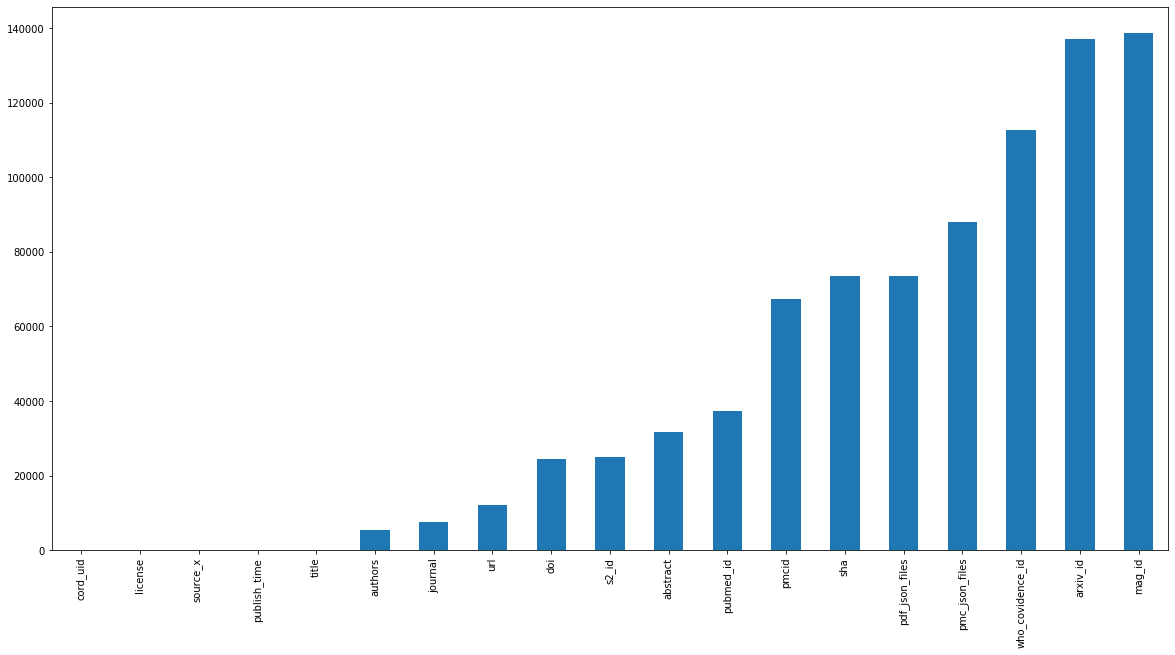

In [18]:
plt.figure(figsize=(20,10))
na_analysis = meta_data.isna().sum()
na_analysis.sort_values().plot(kind='bar', stacked=True, x = 'columns', y = 'count')

## 1.2. Priority Question (Target_table) Analysis
Key Observations: This is a One to many relationship between a priority question to the literatures.
A literature can be referenced multiple times within a question.
This observation provides us with the information that we will need to break down each document into sections

In [19]:
question_1 = 'Effectiveness of a multifactorial strategy to prevent secondary transmission.csv'
priority_question_1 =pd.read_csv(priority_question_path + question_1,index_col=0)
print("Column names: {}".format(priority_question_1.columns))
print("number of rows: ", len(priority_question_1))
priority_question_1.head(10)
priority_question_1.shape

Column names: Index(['Date', 'Study', 'Study Link', 'Journal', 'Study Type', 'Factors',
       'Influential', 'Excerpt', 'Measure of Evidence', 'Added on'],
      dtype='object')
number of rows:  69


(69, 10)

### 1.2.1 Matching between Metadata and Priority data
key observation: Not all literatures referenced in Priority data is in the Metadata. We might need to acquire the literature from external sources

In [20]:
# Testing match between metadata and question 1
match_list = []
for index, row in priority_question_1.iterrows():
    url_row = meta_data.loc[meta_data['url'] == row['Study Link']]['url'].any()
    title_row = meta_data.loc[meta_data['title'] == row['Study']]['title'].any()
    if url_row != False or title_row != False:
        match_list.append(True)
    else:
        match_list.append(False)
print("percentage of matched list is", sum(match_list), "/", len(match_list))

percentage of matched list is 66 / 69


#### 1.2.1.1. Observation from above few observations can be made
1. A literature can be repeated multiple times within each priority question - therefore the articles are segmented into sections for analysis
2. matching meta data with question using both title and url as criteria -> if found then we will be able to identify the JSON within our database
3. there is only one mismatch in priority_question1 that does not have the article within the database
4. Number of rows for each topics are different - data imbalancing.


In [21]:
# Testing the duplication relationship between priority question 1 and literatures
duplicateRowsDF = priority_question_1[priority_question_1.duplicated(['Study'])]
print("Duplicate Rows based on a single column are:", duplicateRowsDF, sep='\n')

Duplicate Rows based on a single column are:
          Date                                              Study  \
8   2020-05-01  Modeling serological testing to inform relaxat...   
16  2020-04-21  Social interventions can lower COVID-19 deaths...   
18  2020-04-20  Data Driven Modeling of Projected Mitigation a...   
21  2020-04-14  A Stratified Model to Quantify the Effects of ...   
34  2020-03-23  The Effectiveness of Social Distancing in Miti...   
35  2020-03-23  The Effectiveness of Social Distancing in Miti...   
36  2020-03-23  The Effectiveness of Social Distancing in Miti...   
37  2020-03-23  The Effectiveness of Social Distancing in Miti...   
38  2020-03-23  The Effectiveness of Social Distancing in Miti...   
39  2020-03-23  The Effectiveness of Social Distancing in Miti...   
40  2020-03-23  The Effectiveness of Social Distancing in Miti...   
41  2020-03-23  The Effectiveness of Social Distancing in Miti...   
42  2020-03-23  The Effectiveness of Social Distancing in 

In [22]:
# Listing all the priority questions 
priority_question_list = [f for f in listdir(priority_question_path) if isfile(join(priority_question_path, f))]
for question in priority_question_list:
    match_list = []
    priority_question_df = pd.read_csv(priority_question_path + question,index_col=0)
    for index, row in priority_question_df.iterrows():
        url_row = meta_data.loc[meta_data['url'] == row['Study Link']]['url'].any()
        title_row = meta_data.loc[meta_data['title'] == row['Study']]['title'].any()
        if url_row != False or title_row != False:
            match_list.append(True)
        else:
            match_list.append(False)
    print(question)
    print("percentage of matched list is", sum(match_list), "/", len(match_list), " = ", sum(match_list)/len(match_list))

Effectiveness of a multifactorial strategy to prevent secondary transmission.csv
percentage of matched list is 66 / 69  =  0.9565217391304348
Effectiveness of case isolation_isolation of exposed individuals to prevent secondary transmission.csv
percentage of matched list is 58 / 59  =  0.9830508474576272
Effectiveness of community contact reduction.csv
percentage of matched list is 36 / 38  =  0.9473684210526315
Effectiveness of inter_inner travel restriction.csv
percentage of matched list is 22 / 24  =  0.9166666666666666
Effectiveness of school distancing.csv
percentage of matched list is 16 / 20  =  0.8
Effectiveness of workplace distancing to prevent secondary transmission.csv
percentage of matched list is 14 / 18  =  0.7777777777777778
Evidence that domesticated_farm animals can be infected and maintain transmissibility of the disease.csv
percentage of matched list is 54 / 75  =  0.72
How does temperature and humidity affect the transmission of 2019-nCoV_.csv
percentage of matched

### 1.2.2. Checking any N/As in the priority questions list
From the observations below, there are some missing values for certain questions in Measure of Evidence

In [23]:
# Checking the quality of the csv file for each questions
for question in priority_question_list:
    print("file name is: ",question)
    priority_question_df = pd.read_csv(priority_question_path + question,index_col=0)
    priority_question_df.info()

file name is:  Effectiveness of a multifactorial strategy to prevent secondary transmission.csv
<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 68
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 69 non-null     object
 1   Study                69 non-null     object
 2   Study Link           69 non-null     object
 3   Journal              69 non-null     object
 4   Study Type           69 non-null     object
 5   Factors              69 non-null     object
 6   Influential          69 non-null     object
 7   Excerpt              69 non-null     object
 8   Measure of Evidence  68 non-null     object
 9   Added on             69 non-null     object
dtypes: object(10)
memory usage: 5.9+ KB
file name is:  Effectiveness of case isolation_isolation of exposed individuals to prevent secondary transmission.csv
<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 e

## 1.3. Matching metadata and Priority question data by URL or the Title of the article
Trying to find a match between the question file and the metadata to find whether the downloaded database contains the file, if not then web scraping might be required to obtain the information from the URL provided

In [24]:
# Obtaining all files names from all priority_question list into one dataframe
# Metadata -> We want pdf_json_files, pmc_json_files

pdf_json_files_list = [];
pmc_json_files_list = [];
research_topic_list = [];
topic_id_list = [];
topic_id = 1
combined_ques_literature = [];
for question in tqdm(priority_question_list):
    print("file name is: ",question)
    priority_question_df = pd.read_csv(priority_question_path + question,index_col=0)
    combined_ques_literature.append(priority_question_df)
    for index, row in priority_question_df.iterrows():
        # Match using URL or title
        url_match_row = meta_data.loc[meta_data['url'] == row['Study Link']]
        title_match_row = meta_data.loc[meta_data['title'] == row['Study']]
        if not url_match_row.empty or not title_match_row.empty:
            if not url_match_row.empty:
                pdf_json_files_list.append(url_match_row['pdf_json_files'].values[0])
                pmc_json_files_list.append(url_match_row['pmc_json_files'].values[0])
            else:
                pdf_json_files_list.append(title_match_row['pdf_json_files'].values[0])
                pmc_json_files_list.append(title_match_row['pmc_json_files'].values[0])
        else:
            pdf_json_files_list.append(" ")
            pmc_json_files_list.append(" ")
        topic_id_list.append(topic_id)
        research_topic_list.append(question.split('.')[0])
    topic_id = topic_id + 1

# combining all datarfame into one big dataframe
combined_ques_literature = pd.concat(combined_ques_literature);

  0%|                                                                                           | 0/11 [00:00<?, ?it/s]

file name is:  Effectiveness of a multifactorial strategy to prevent secondary transmission.csv


  9%|███████▌                                                                           | 1/11 [00:01<00:10,  1.07s/it]

file name is:  Effectiveness of case isolation_isolation of exposed individuals to prevent secondary transmission.csv


 18%|███████████████                                                                    | 2/11 [00:01<00:09,  1.02s/it]

file name is:  Effectiveness of community contact reduction.csv


 27%|██████████████████████▋                                                            | 3/11 [00:02<00:07,  1.12it/s]

file name is:  Effectiveness of inter_inner travel restriction.csv


 36%|██████████████████████████████▏                                                    | 4/11 [00:02<00:05,  1.36it/s]

file name is:  Effectiveness of school distancing.csv


 45%|█████████████████████████████████████▋                                             | 5/11 [00:03<00:03,  1.65it/s]

file name is:  Effectiveness of workplace distancing to prevent secondary transmission.csv


 55%|█████████████████████████████████████████████▎                                     | 6/11 [00:03<00:02,  1.97it/s]

file name is:  Evidence that domesticated_farm animals can be infected and maintain transmissibility of the disease.csv


 64%|████████████████████████████████████████████████████▊                              | 7/11 [00:04<00:02,  1.46it/s]

file name is:  How does temperature and humidity affect the transmission of 2019-nCoV_.csv


 73%|████████████████████████████████████████████████████████████▎                      | 8/11 [00:05<00:02,  1.28it/s]

file name is:  Methods to understand and regulate the spread in communities.csv


 82%|███████████████████████████████████████████████████████████████████▉               | 9/11 [00:05<00:01,  1.59it/s]

file name is:  Seasonality of transmission.csv


 91%|██████████████████████████████████████████████████████████████████████████▌       | 10/11 [00:07<00:00,  1.12it/s]

file name is:  What is the likelihood of significant changes in transmissibility in changing seasons_.csv


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:08<00:00,  1.32it/s]


In [25]:
# Checking if previous result provides the correct dimension for the output
print(len(topic_id_list), len(pmc_json_files_list), len(pdf_json_files_list), len(research_topic_list))
print("before adding columns: ", combined_ques_literature.shape)
print(combined_ques_literature.columns)
combined_ques_literature.insert(1, "topic_id", topic_id_list, True)
combined_ques_literature.insert(2, "research_topic", research_topic_list, True)
combined_ques_literature.insert(3, "pdf_json_files", pdf_json_files_list, True)
combined_ques_literature.insert(4, "pmc_json_files", pmc_json_files_list, True)

print("after adding columns: ", combined_ques_literature.shape)

547 547 547 547
before adding columns:  (547, 14)
Index(['Date', 'Study', 'Study Link', 'Journal', 'Study Type', 'Factors',
       'Influential', 'Excerpt', 'Measure of Evidence', 'Added on',
       'Infuential', 'Date Published', 'Influential (Y/N)',
       'Factors Described'],
      dtype='object')
after adding columns:  (547, 18)


### 1.3.1. Observation on merging metadata and priority questions
Based on observations:
1. the tables within priority questions are inconsistent with each other -> i.e. the columns are referring to the same thing
Factors, Factors Described
Influential,Infuential,Influential (Y/N)

<br> Hence, next step would be to perform some cleaning to merge the duplicated rows 

In [26]:
combined_ques_literature[['Influential','Infuential','Influential (Y/N)']].info()
combined_ques_literature[['Factors', 'Factors Described']].info()
combined_ques_literature[['Date', 'Date Published']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 547 entries, 0 to 58
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Influential        454 non-null    object
 1   Infuential         75 non-null     object
 2   Influential (Y/N)  18 non-null     object
dtypes: object(3)
memory usage: 17.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 547 entries, 0 to 58
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Factors            488 non-null    object
 1   Factors Described  59 non-null     object
dtypes: object(2)
memory usage: 12.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 547 entries, 0 to 58
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            470 non-null    object
 1   Date Published  77 non-null     object
dtypes: ob

### 1.3.2. Observation on Duplicated Rows
Merging the Influential columns together will yield a complete 547 rows of non- null values. which is good. Same Approach will be peformed for observations

In [27]:
combined_ques_literature['Influential'] = combined_ques_literature['Influential'].fillna(combined_ques_literature['Infuential'])
combined_ques_literature['Influential'] = combined_ques_literature['Influential'].fillna(combined_ques_literature['Influential (Y/N)'])            
combined_ques_literature['Factors'] = combined_ques_literature['Factors'].fillna(combined_ques_literature['Factors Described'])
combined_ques_literature['Date'] = combined_ques_literature['Date'].fillna(combined_ques_literature['Date Published'])
combined_ques_literature = combined_ques_literature.drop(['Infuential', 'Influential (Y/N)', 'Factors Described', 'Date Published'], axis=1)

In [28]:
print(combined_ques_literature.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 547 entries, 0 to 58
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 547 non-null    object
 1   topic_id             547 non-null    int64 
 2   research_topic       547 non-null    object
 3   pdf_json_files       482 non-null    object
 4   pmc_json_files       158 non-null    object
 5   Study                547 non-null    object
 6   Study Link           547 non-null    object
 7   Journal              547 non-null    object
 8   Study Type           547 non-null    object
 9   Factors              547 non-null    object
 10  Influential          547 non-null    object
 11  Excerpt              547 non-null    object
 12  Measure of Evidence  541 non-null    object
 13  Added on             547 non-null    object
dtypes: int64(1), object(13)
memory usage: 64.1+ KB
None


### 1.4. Scoping and finalising the Categorisation the data
Since Not all rows contains the literature within the database, we will remove the labelled data for ones that does not have data in pdf_json_files. This is to simplify this solution for the purpose of machine learning
This can potentially be future work to develop a methodology for web scrapping techniques to obtain the literature from external sources outside CORD-19

In [29]:
# Drop all the na and spaces on the pdf_json_file to make sure all labelled data is linked to a literature stored in database

scoped_categorised_literature = combined_ques_literature.dropna(subset=['pdf_json_files'])
scoped_categorised_literature = scoped_categorised_literature[~scoped_categorised_literature['pdf_json_files'].str.isspace()] 
scoped_categorised_literature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 58
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 400 non-null    object
 1   topic_id             400 non-null    int64 
 2   research_topic       400 non-null    object
 3   pdf_json_files       400 non-null    object
 4   pmc_json_files       75 non-null     object
 5   Study                400 non-null    object
 6   Study Link           400 non-null    object
 7   Journal              400 non-null    object
 8   Study Type           400 non-null    object
 9   Factors              400 non-null    object
 10  Influential          400 non-null    object
 11  Excerpt              400 non-null    object
 12  Measure of Evidence  394 non-null    object
 13  Added on             400 non-null    object
dtypes: int64(1), object(13)
memory usage: 46.9+ KB


### 1.5. Exporting the cleansed and mapped data into a pickle file

In [30]:
scoped_categorised_literature.to_pickle("./1_scoped_cat_lit.pkl")